In [1]:
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
from specutils import Spectrum1D

In [2]:
from astropy.io import fits
from astropy.table import Table
hdul = fits.open('2M0032_ISAACspec_JHK_nocosmics.fits')
Table(hdul[1].data)

wavelength,flux
float32,float32
1.1,3.8379937e-19
1.1001,3.8154512e-19
1.1002,3.8123888e-19
1.1003001,3.8262025e-19
1.1004,3.850999e-19
...,...
2.4995,8.9522e-20
2.4996,8.628944e-20
2.4997,8.402004e-20


In [3]:
import astropy
import seaborn as sns
from astropy.io import fits
fits_image_filename = astropy.io.fits.open('2M0032_ISAACspec_JHK_nocosmics.fits')
hdul = fits.open('2M0032_ISAACspec_JHK_nocosmics.fits')
data = hdul[0].data
header = hdul[0].header
#list(header.keys())
print(header[3])

True


In [4]:
#2M2213_ISAACspec_JHK_nocosmic.fits
fits_image_filename = astropy.io.fits.open('2M2213_ISAACspec_JHK_nocosmic.fits')
hdul = fits.open('2M2213_ISAACspec_JHK_nocosmic.fits')
data = hdul[0].data
header = hdul[0].header
#list(header.keys())
print(header[10])
##only this one works???

-21.60222222222222


In [5]:
f = fits.open('2M0032_ISAACspec_JHK_nocosmics.fits')  
# The spectrum is in the second HDU of this file.
specdata = f[1].data 
f.close() 

In [6]:
wavelength_unit = u.micron  #using astropy to defien units 
flux_unit = u.erg/u.cm/u.cm/u.s/u.Angstrom

In [7]:
lamb = 10**specdata['wavelength'] * wavelength_unit # u.AA 
flux = specdata['flux'] * flux_unit #10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
print(lamb)
print(flux)
flux_unit = f[1].header['TUNIT2']
wavelength = specdata['wavelength'] * wavelength_unit # u.AA 

[ 12.589254   12.5921545  12.595055  ... 316.08215   316.15485
 316.22775  ] micron
[3.8379937e-19 3.8154512e-19 3.8123888e-19 ... 8.2326159e-20 8.1171919e-20
 8.0546706e-20] erg / (Angstrom cm2 s)


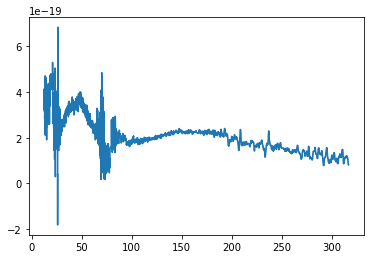

In [8]:
f, ax = plt.subplots()  
ax.step(spec.spectral_axis, spec.flux) 

In [77]:
from glob import glob
import astropy.io.fits as pyfits
from matplotlib import pyplot as plt
import os
files = glob('/Users/jolie/gitlocation/rewrite spectra/Manj14/*.fits')

for file_name in files:
    f = fits.open(file_name)
    name = file_name[48:-len('.fits')]
    print(name)

2M0032_ISAACspec_JHK_nocosmics
2M2126_ISAACspec_JHK_nocosmics
2M2322_ISAACspec_JHK_nocosmics
2M2208_ISAACspec_JHK_nocosmics
ChaJ1305_ISAACspec_JHK_nocosmics_2_dered
2M2213_ISAACspec_JHK_nocosmic


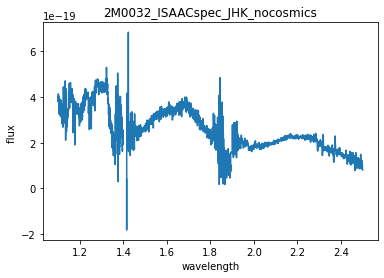

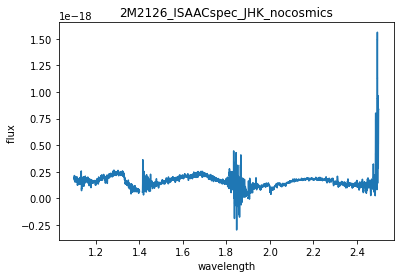

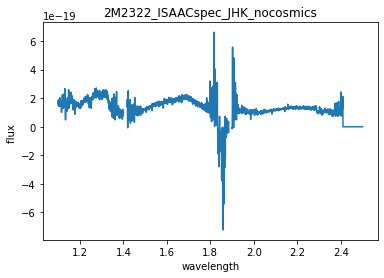

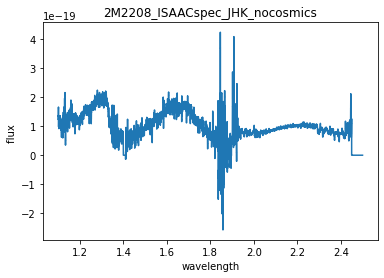

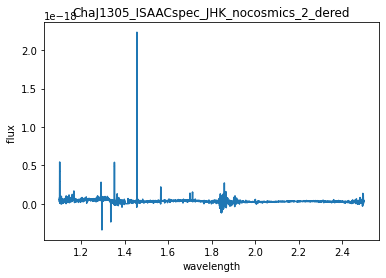

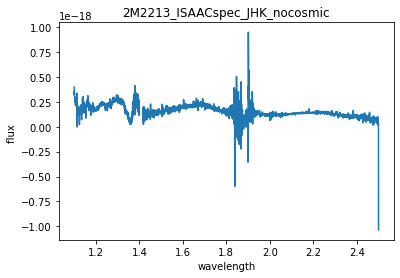

In [78]:
files = glob('/Users/jolie/gitlocation/rewrite spectra/Manj14/*.fits')

for file_name in files:
    f = fits.open(file_name)
    name = file_name[48:-len('.fits')] # Remove .fits from the file name
    # The spectrum is in the second HDU of this file.
    specdata = f[1].data
    f.close()
    wavelength_unit = u.micron  #using astropy to defien units
    flux_unit = u.erg/u.cm/u.cm/u.s/u.Angstrom
    wavelength = specdata['wavelength'] * wavelength_unit # u.AA
    flux = specdata['flux'] * flux_unit #10**-17 * u.Unit('erg cm-2 s-1 AA-1')
    spec = Spectrum1D(spectral_axis=wavelength, flux=flux)
    f, ax = plt.subplots()
    ax.step(spec.spectral_axis, spec.flux)
    plt.xlabel('wavelength')
    plt.ylabel('flux ')
    plt.title(name)
    


In [ ]:
f = fits.open('/Users/jolie/gitlocation/rewrite spectra/Manj14/2M0032_ISAACspec_JHK_nocosmics.fits')
specdata = f[1].data
wavelength_unit = u.micron  #using astropy to defien units
flux_unit = u.erg/u.cm/u.cm/u.s/u.Angstrom
wavelength = specdata['wavelength'] * wavelength_unit # u.AA
flux = specdata['flux'] * flux_unit #10**-17 * u.Unit('erg cm-2 s-1 AA-1')
spec = Spectrum1D(spectral_axis=wavelength, flux=flux)
f, ax = plt.subplots()
ax.step(spec.spectral_axis, spec.flux)
# plt.xlabel('wavelength')
# plt.ylabel('flux ')
plt.show()

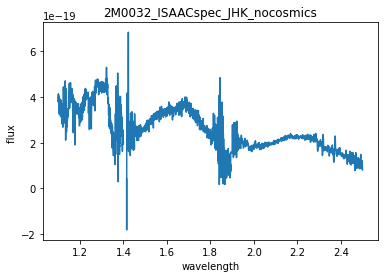

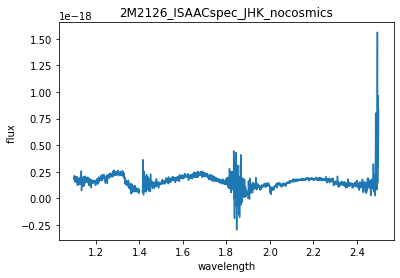

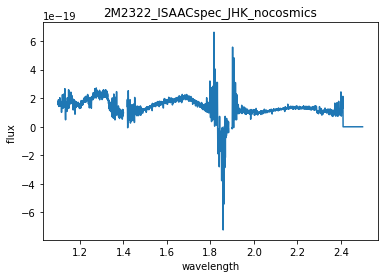

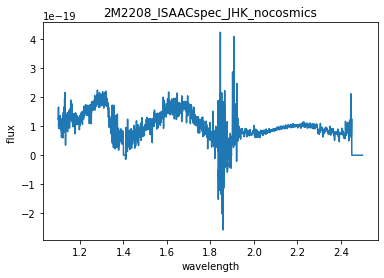

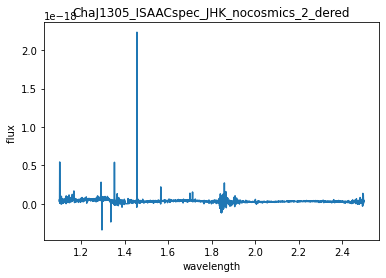

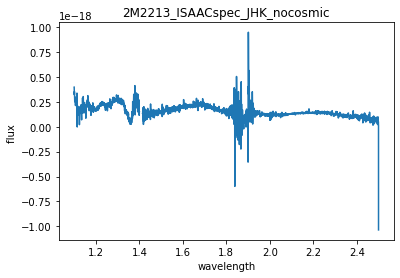

In [10]:
files = glob('*.fits')
fits_data_dir = 'pngs/'

for file_name in files:
    data = pyfits.getdata(file_name)
    name = file_name[:-len('.fits')] # Remove .fits from the file name

    wavelength  = data['wavelength']
    flux = data['flux']

    plt.plot(wavelength, flux)

    plt.xlabel('wavelength')
    plt.ylabel('flux ')
    plt.title(name)

    plt.savefig(fits_data_dir + name + '.png')
    plt.show()
   # print(data['flux'])